In [1]:
import json

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
data_path = "../input/challenge-data/"

# train.csv

In [3]:
df = pd.read_csv(data_path+'train.csv', dtype=str)
df

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
...,...,...,...,...,...
19656,b3498176-8832-4033-aea6-b5ea85ea04c4,RSNA International Trends: A Global Perspectiv...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID Open Radiology Database,rsna international covid open radiology database
19657,f77eb51f-c3ac-420b-9586-cb187849c321,MCCS: a novel recognition pattern-based method...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19658,ab59bcdd-7b7c-4107-93f5-0ccaf749236c,Quantitative Structure–Activity Relationship M...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19659,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...


In [4]:
df.describe()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
count,19661,19661,19661,19661,19661
unique,14316,14271,45,130,130
top,170113f9-399c-489e-ab53-2faf5c64c5bc,Science and Engineering Indicators 2014,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
freq,22,22,6144,3673,3673


19661 rows but 14316 unique id  
→ some publications mention multiple datasets and thus appear on different rows  
14316 unique ids but 14271 unique pub_title  
→ some publications have the same title  

45 unique dataset_title but 130 dataset_label/cleaned_label  
→ publications refer to the same dataset (dataset_title: true name according to the organizers) in different ways (dataset_label)  
→ same number of dataset_label and cleaned_label means that for these examples the cleaning process does not output the same cleaned_label for different dataset_labels, which it theoretically could (for instance if a paper uses « Covid-19 dataset » and an other « COVID-19 dataset »). Can training on the raw text vs training on the clean text show a big difference in model performance?

## Publications with multiple datasets
__/!\\__ the training set is not exhaustively labeled / not all datasets have been identified in train  
→ if this means that there are datasets appearing in .json train files that are not identified in train.csv, then the following figures are not representative of the reality

In [92]:
datasets_per_paper = df['Id'].value_counts()
print((datasets_per_paper == 1).sum(), (datasets_per_paper == 1).sum()/len(datasets_per_paper))
print((datasets_per_paper == 2).sum(), (datasets_per_paper == 2).sum()/len(datasets_per_paper))

9563 0.6679938530315731
4410 0.3080469404861693


9563 papers (66,8%) cite only one dataset, 4410 (30,8%) cite two datasets.  
97,6% cite one or two datasets.

<AxesSubplot:>

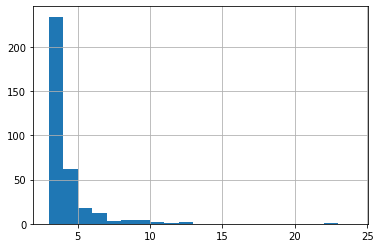

In [98]:
datasets_per_paper[datasets_per_paper != 1].hist(bins=np.arange(25)[3:])

## Publications with same title

In [162]:
tmp = df[~df.duplicated(['Id'])] # remove duplicate 'Id' (publication with multiple datasets)
same_title = tmp[tmp.duplicated('pub_title', keep=False)].groupby('pub_title')[['Id']].agg(list)#sort_values('pub_title')
same_title

,Id
pub_title,
A quantitative examination of lightning as a predictor of peak winds in tropical cyclones,"[d1954347-2b50-4b06-991a-6e6d018aee98, 64e61b3..."
A structural equation model for imaging genetics using spatial transcriptomics,"[6120275e-3ba8-4e1e-af75-30fd907fc24a, c694fcd..."
"Agricultural Resources and Environmental Indicators, 2012 Edition","[126351b2-11fc-4c32-9beb-62a593531b0a, a2c28b4..."
Alzheimer's disease Archimedes condition-event simulator: Development and validation,"[77ac09b9-cbec-4c12-a4fa-b392cbcca181, a7d4c1e..."
Assessing the oceanic control on the amplitude of sea surface cooling induced by tropical cyclones,"[79faa12f-d122-49a6-8182-ff6146081a6f, aa75f8b..."
Basal forebrain volume reliably predicts the cortical spread of Alzheimer’s degeneration,"[a768a188-6de7-4414-934f-436c806dd2b8, e2bd935..."
"Characteristics and Production Costs of U.S. Hog Farms, 2004","[4d36bb2d-e128-48b3-8b52-5193adcb3d3a, 9a26ef5..."
Characterizing biomarker features of cognitively normal individuals with ventriculomegaly,"[4f6e6a31-66a4-498c-9abb-2a08e60cb124, 8e789ed..."
"Climate Change, Heat Stress, and U.S. Dairy Production","[14f2137d-f9b6-4203-aae8-3b6b8fbe0d93, d6a7989..."


In [171]:
same_title.iloc[0].Id

['d1954347-2b50-4b06-991a-6e6d018aee98',
 '64e61b31-f198-4925-8aed-f9cbcf1b8a96']

In [167]:
with open(data_path+'train/'+same_title.iloc[0].Id[0]+'.json') as f:
  f1 = json.load(f)
with open(data_path+'train/'+same_title.iloc[0].Id[1]+'.json') as f:
  f2 = json.load(f)

In [175]:
pprint(f1[-1])

{'section_title': 'Conclusions',
 'text': 'We have recreated the Price approach for a set of 58 tropical '
         'cyclones but were unable to duplicate the exact results that were '
         'found in this study. However, we confirmed their broad conclusions '
         'that the observed lightning variability is correlated to wind '
         'variability and that on average, the lightning variation leads the '
         'wind variation by ∼1 day. The Price approach has been extended from '
         'the original 3 years of data to an 8 year data set which returns '
         'broadly similar lag and correlation results when using a lightning '
         'collection window of 10\n'
         '• square or of 500 km radius. The cross-correlation matching between '
         'wind and lightning only has an ∼8% failure rate. We have calculated '
         'both the 10\n'
         '• × 10\n'
         '• square lightning detection window, a radial distance in '
         'kilometers, and performe

In [176]:
pprint(f2[-1])

{'section_title': 'Conclusions',
 'text': 'We have recreated the Price approach for a set of 58 tropical '
         'cyclones but were unable to duplicate the exact results that were '
         'found in this study. However, we confirmed their broad conclusions '
         'that lightning variability seems to be correlated to wind '
         'variability and that on average, the lightning variation leads the '
         'wind variation by ∼1 day. The Price approach has been extended from '
         'the original 3 years of data to an 8 year dataset which returns '
         'broadly similar lag and correlation results when using a lightning '
         'collection window of 10 • square or of 500 km radius. The cross '
         'correlation matching between wind and lightning only has an ∼8% '
         'failure rate. We have calculated both the 10 • x 10 • square '
         'lightning detection window, a radial distance in kilometers, and '
         'performed the lightning to wind cross co

In [177]:
same_title.iloc[1].Id

['6120275e-3ba8-4e1e-af75-30fd907fc24a',
 'c694fcdd-50a8-4018-a295-e4310cfb4dd5']

In [178]:
with open(data_path+'train/'+same_title.iloc[1].Id[0]+'.json') as f:
  f1 = json.load(f)
with open(data_path+'train/'+same_title.iloc[1].Id[1]+'.json') as f:
  f2 = json.load(f)

In [194]:
pprint(f1[0:2])

[{'section_title': 'Abstract',
  'text': 'Imaging genetics deals with relationships between genetic variation '
          'and imaging variables, often in a disease context. The complex '
          'relationships between brain volumes and genetic variants have been '
          'explored with both dimension reduction methods and model-based '
          'approaches. However, these models usually do not make use of the '
          'extensive knowledge of the spatio-anatomical patterns of gene '
          'activity. We present a method for integrating genetic markers '
          '(single nucleotide polymorphisms) and imaging features, which is '
          'based on a causal model and, at the same time, uses the power of '
          'dimension reduction. We use structural equation models to find '
          'latent variables that explain brain volume changes in a disease '
          'context, and which are in turn affected by genetic variants. We '
          'make use of publicly available 

In [195]:
pprint(f2[0:2])

[{'section_title': 'Abstract',
  'text': "Alzheimer's disease is a neurodegenerative disorder that causes "
          'changes in the structure of the brain, observable with MRI scans, '
          'and that has a strong heritable component, reflected in the DNA. '
          'Imaging genetics deals with such relationships between genetic '
          'variation and imaging variables, often in a disease context. The '
          'complex relationships between brain volumes and genetic variants '
          'have been explored both with dimension reduction methods and model '
          'based approaches. However, these models usually do not make use of '
          'the extensive knowledge of the spatio-anatomical patterns of gene '
          'activity. We present a method for integrating genetic markers '
          '(single nucleotide polymorphisms) and imaging features, which is '
          'based on a causal model and, at the same time, uses the power of '
          'dimension reduction. W

In [198]:
pprint(f1[-1:])

[{'section_title': 'Conclusion',
  'text': 'We have proposed the use of a maximum likelihood structural '
          'equation model for combining SNP data and structural brain area '
          'measurements. The model makes use of external gene expression data, '
          'to define groups of brain regions that may respond similarly to '
          'genetic variation. For each of these region groups, we define a '
          'latent variable, which captures the relationship between the '
          'regions in a group and genetic variation. We have applied the model '
          'to a simulated data set, to show it can capture disease-relevant '
          'variation and identify causal SNPs. In addition, we have applied '
          "the model to the ADNI data set, containing Alzheimer's patients, "
          'individuals with late mild cognitive impairment, and cognitive '
          'healthy controls. One SNP, linked to APOE, shows a reproducible '
          'significant relationship to t

In [199]:
pprint(f2[-2:])

[{'section_title': 'Conclusion',
  'text': 'We have proposed the use of a maximum likelihood structural '
          'equation model for combining SNP data and structural brain area '
          'measurements. The model makes use of external gene expression data, '
          'to define groups of brain regions that may respond similarly to '
          'genetic variation. For each of these region groups, we define a '
          'latent variable, which captures the relationship between the '
          'regions in a group and genetic variation. We have applied the model '
          'on a simulated dataset, to show it can capture disease relevant '
          'variation and identify causal SNPs. In addition, we have applied '
          "the model to the ADNI dataset, containing Alzheimer's patients, "
          'individuals with late mild cognitive impairment, and cognitive '
          'healthy controls. One SNP, linked to APOE, shows a reproducible '
          'significant relationship to the

We can see that these are not different publications with the same name, but the same publication duplicated in the train/ folders, with different ids.  
They sometime have a different abstracts, an extra section at the end.  
So they may be different versions of the same paper.

Indeed, for "A structural equation model for imaging genetics using spatial transcriptomics", the first id corresponds to the Brain Informatics edition and the second is from Biorxiv.org

# Publications with redundant dataset_label

In [22]:
df[df.duplicated(['Id', 'cleaned_label'], keep=False)].sort_values('Id')

,Id,pub_title,dataset_title,dataset_label,cleaned_label


Il n'y a pas de publications dont on été extrait plusieurs références utilisant la même dénomination. À priori beaucoup de ces papiers ont dû citer plusieurs fois un même dataset en utilisant la même dénomination.

In [23]:
df[df.duplicated(['Id', 'dataset_title'], keep=False)].sort_values('Id')

,Id,pub_title,dataset_title,dataset_label,cleaned_label
10461,000efc17-13d8-433d-8f62-a3932fe4f3b8,Risk factors and global cognitive status relat...,Alzheimer's Disease Neuroimaging Initiative (A...,Alzheimer's Disease Neuroimaging Initiative (A...,alzheimer s disease neuroimaging initiative adni
4511,000efc17-13d8-433d-8f62-a3932fe4f3b8,Risk factors and global cognitive status relat...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
10560,002203f0-1c57-4400-abc1-b783c4085743,A Hybrid Geometric–Statistical Deformable Mode...,Alzheimer's Disease Neuroimaging Initiative (A...,Alzheimer's Disease Neuroimaging Initiative (A...,alzheimer s disease neuroimaging initiative adni
5528,002203f0-1c57-4400-abc1-b783c4085743,A Hybrid Geometric–Statistical Deformable Mode...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
812,00248da3-ac1d-48fa-a95e-cc88553f9583,Evaluation of Movement Speed and Reaction Time...,Baltimore Longitudinal Study of Aging (BLSA),Baltimore Longitudinal Study of Aging (BLSA),baltimore longitudinal study of aging blsa
...,...,...,...,...,...
1950,ffb86ab1-eed2-423e-a9ee-34c93465fdb2,Candidate Gene Polymorphisms for Ischemic Stroke,Baltimore Longitudinal Study of Aging (BLSA),Baltimore Longitudinal Study of Aging,baltimore longitudinal study of aging
9479,ffc640be-c934-4421-89bf-cfc0ec6ead13,Predicting the location of human perirhinal co...,Alzheimer's Disease Neuroimaging Initiative (A...,Alzheimer's Disease Neuroimaging Initiative (A...,alzheimer s disease neuroimaging initiative adni
4625,ffc640be-c934-4421-89bf-cfc0ec6ead13,Predicting the location of human perirhinal co...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
11079,ffee2676-a778-4521-b947-e1e420b126c5,A different viewpoint on student retention,Beginning Postsecondary Student,Beginning Postsecondary Students,beginning postsecondary students


En revanche, il y a beaucoup de publications au sein desquelles ont été extrait plusieurs références au même dataset (utilisant donc des dénominations différentes, par exemple le nom complet et le sigle).

# dataset_title vs dataset_label
dataset_title is the 'canonical' dataset name.  
dataset_label is how the dataset is referred to in the paper. It is what we are trying to extract from the paper.  
cleaned_label is the output of passing dataset_label to the clean_text function and should be submitted to Kaggle. It's what we are trying to predict.

## multiple dataset_label per dataset_title

In [31]:
same_dataset = df.groupby('dataset_title')[['dataset_label', 'Id']].agg(set)
same_dataset

,dataset_label,Id
dataset_title,,
Advanced National Seismic System (ANSS) Comprehensive Catalog (ComCat),"{ANSS Comprehensive Catalog, Advanced National...","{0c492961-c5e0-4462-8f5f-d764efa5eeac, b42f914..."
Aging Integrated Database (AGID),"{Aging Integrated Database (AGID), Aging Integ...","{71d14baa-31df-4e80-9c18-af7516be766c, 93c27c1..."
Agricultural Resource Management Survey,{ARMS Farm Financial and Crop Production Pract...,"{f8c76e38-fb08-45a5-aad4-860e62a0c7cc, 3f39ff1..."
Alzheimer's Disease Neuroimaging Initiative (ADNI),{Alzheimer's Disease Neuroimaging Initiative (...,"{79cac249-dde4-4a20-9c87-a0c319c04b52, 7803af0..."
Baccalaureate and Beyond,"{Baccalaureate and Beyond, Baccalaureate and B...","{335a83a5-0fc0-4820-881b-5e086deb2894, 7f1ba39..."
Baltimore Longitudinal Study of Aging (BLSA),"{Baltimore Longitudinal Study of Aging, Baltim...","{71a95210-5a27-4a08-bed3-82ab436455f3, 97c72d4..."
Beginning Postsecondary Student,"{Beginning Postsecondary Students, Beginning P...","{72e069f6-357c-425b-b9f5-535bba3bdc00, e40099d..."
CAS COVID-19 antiviral candidate compounds dataset,{CAS COVID-19 antiviral candidate compounds da...,"{fd23e7e0-a5d2-4f98-992d-9209c85153bb, f77eb51..."
COVID-19 Deaths data,{COVID-19 Death data},"{7d4c3cd3-9986-41f9-a8c2-c90eb5669aef, 98e2dda..."


Some dataset_title include their initialism, some don't.  
Some include initialism without the detailed form.  
What is the logic behind this?  
→ did they choose the name given by the publishers of the original dataset?

In [29]:
pprint(list(same_dataset.index[[0, 2, 19, 23]]))

['Advanced National Seismic System (ANSS) Comprehensive Catalog (ComCat)',
 'Agricultural Resource Management Survey',
 'FFRDC Research and Development Survey',
 'NOAA Tide Gauge']


## Issues
### dataset_label does not appear in the json

In [94]:
first_dataset_ids = list(same_dataset.iloc[0]['Id'])

In [95]:
with open(data_path+'train/'+first_dataset_ids[1]+'.json') as f:
  f = json.load(f)
print(first_dataset_ids[1])
print(df[df['Id'] == first_dataset_ids[1]]['dataset_label'].values)

b42f914e-72d8-4654-80fb-af98016328c0
['Advanced National Seismic System (ANSS) Comprehensive Catalog (ComCat)'
 'ANSS Comprehensive Catalog']


In [96]:
pprint(f)

[{'section_title': 'Abstract',
  'text': 'Abstract We present new marine seismic-reflection profiles and '
          'bathymetric maps to characterize Holocene depositional patterns, '
          'submarine landslides, and active faults beneath eastern and central '
          'Prince William Sound (PWS), Alaska, which is the eastern rupture '
          'patch of the 1964 M w 9.2 earthquake. We show evidence that '
          'submarine landslides, many of which are likely earthquake '
          'triggered, repeatedly released along the southern margin of Orca '
          'Bay in eastern PWS. We document motion on reverse faults during the '
          '1964 Great Alaska earthquake and estimate late Holocene slip rates '
          'for these growth faults, which splay from the subduction zone '
          'megathrust. Regional bathymetric lineations help define the faults '
          'that extend 40-70 km in length, some of which show slip rates as '
          'great as 3:75 mm=yr. We infer

« Advanced National Seismic System (ANSS) Comprehensive Catalog (ComCat) » appears in the file but  
« ANSS Comprehensive Catalog » does not (unless as a substring of the above string if you remove the parenthesis)

### dataset_label does not include the whole clause from the text

In [97]:
second_dataset_ids = list(same_dataset.iloc[1]['Id'])
second_dataset_ids

['71d14baa-31df-4e80-9c18-af7516be766c',
 '93c27c16-9356-4b97-9785-9795ad9bb609']

In [92]:
with open(data_path+'train/'+second_dataset_ids[0]+'.json') as f:
  f = json.load(f)
print(second_dataset_ids[0])
print(df[df['Id'] == second_dataset_ids[0]]['dataset_label'].values)

71d14baa-31df-4e80-9c18-af7516be766c
['Aging Integrated Database']


In [77]:
pprint(f)

[{'section_title': '',
  'text': 'an increased awareness and ability to sustain low-care NH residents '
          'in the community. Furthermore, NHs in states with more generous '
          'Medicaid payment rates may have an incentive to have residents with '
          'low-care needs to decrease their expenditures on care while '
          'receiving a similar payment rate.'},
 {'section_title': 'METHOD', 'text': ''},
 {'section_title': 'Data',
  'text': 'The OAA requires annual performance reporting by SUAs through the '
          'State Program Report (SPR). The SPR provides information on the '
          'characteristics of clients, the types and levels of service, '
          'expenditures of funds from the OAA and other sources, and '
          'administrative information about SUAs and local AAAs. These data '
          'were downloaded for years 2000-2009 from the Administration on '
          "Aging's Aging Integrated Database (AGID) from "
          'http://classic.agidnet.

dataset_label is « Aging Integrated Database »  
but the whole clause includes the initialism: « Aging Integrated Database (AGID) »  
which also happens to be the case of the dataset-title.

In [91]:
with open(data_path+'train/'+second_dataset_ids[1]+'.json') as f:
  f = json.load(f)
print(second_dataset_ids[1])
print(df[df['Id'] == second_dataset_ids[1]]['dataset_label'].values)

93c27c16-9356-4b97-9785-9795ad9bb609
['Aging Integrated Database (AGID)' 'Aging Integrated Database']


In [85]:
pprint(f)

[{'section_title': 'T',
  'text': 'here are myriad statistical sources available on the Internet, '
          'however, it can be diffi cult to quickly locate the resources a '
          'researcher needs. To help make sense of this plethora of data, the '
          'EBSS Reference Sources and Services committee compiled a '
          'bibliography of online statistical resources in the subject areas '
          'of education, social work, gerontology, counseling psychology, and '
          'the general social sciences in January 2006. This bibliography '
          'became a wiki that is available at http://wikis.ala.org/acrl '
          '/index.php/A_Statistical_Directory_for '
          '_Education_%26_Social_Science_Librarians.\n'
          'Below are a selection of these core resources that will prove '
          'helpful to librarians assisting researchers in need of statistical '
          'data. Most resources are starting points and include specialized '
          'reports and 

this time « Aging Integrated Database (AGID) » appears twice  
dataset_label is once « Aging Integrated Database (AGID) » and once « Aging Integrated Database »   

In [98]:
id = 'edebce9a-6198-4015-b2f5-48d580a78ee4'
with open(data_path+'train/'+id+'.json') as f:
  f = json.load(f)
print(df[df['Id'] == id]['dataset_label'].values)
pprint(f)

['Trends in International Mathematics and Science Study']
[{'section_title': 'Abstract',
  'text': 'Public perception of "declining standards" in school-leaving '
          'examinations often accompanies increases in pass rates in '
          'schoolleaving examinations. "Declining standards" to the public '
          'means easier examination papers. The present study evaluates a '
          'South African attempt to estimate the level of difficulty, as '
          'distinct from cognitive demand, to exit-level examination papers in '
          'Life Sciences. A team of four expert raters assigned a level of '
          'difficulty ranging from 1 (easy) to 4 (very difficult). Invalid '
          'items were assigned a difficulty level of 0. The reference point '
          'was "the ideal average South African learner." Discussion and '
          'practice was conducted for 12 examination papers, followed by '
          'individual analysis of four examination papers. Inter-rater '
  

The above paper mentions "Trends in International Mathematics and Science Study (TIMSS) 2003".  
But the corresponding 'dataset_label' value is "Trends in International Mathematics and Science Study" withouth the initialism.  
(is it because the dataset title "Trends in International Mathematics and Science Study" does not include either the initialism?)

In [106]:
id = 'e5c2f204-45a8-433b-b0dd-fede6c2331a7'
with open(data_path+'train/'+id+'.json') as f:
  f = json.load(f)
print(df[df['Id'] == id]['dataset_label'].values)
print(df[df['Id'] == id]['cleaned_label'].values)
print(f)

['ADNI' "Alzheimer's Disease Neuroimaging Initiative (ADNI)"]
['adni' 'alzheimer s disease neuroimaging initiative adni ']
[{'section_title': 'Abstract', 'text': "As estimated there are about 5.3 million who suffer from Alzheimer's disease in United States. The incidence is increasing as the population is aging. Due to the increasing trend of Alzheimer's disease, there is a lot of discussion on prevention efforts or slowing the incidence. Also, models that could predict individual risk of cognitive impairment are needed to assist in prevention efforts.\nIn general dementia development has been associated with growth in various vascular, lifestyle and other risk factors. Epidemiological research provides evidence of some vascular, lifestyle and psychological risk factors that are modifiable and protective of disease incidence either independently or while interacting with other factors. However, as reported by National Institute of Aging, it is not yet clear whether health or lifestyle 

« Alzheimer's Disease Neuroimaging Initiative (ADNI) » appears 4 times  
they are 2 entries in the train.csv  
Health and Retirement Study (HRS) does not appear in train.csv  
→ not all datasets have been identified in train

In [ ]:
# voir comment est traité le cas où un même papier cite plusieurs fois le même dataset de façon différentes
# et lorsqu'un papier cite un dataset en juxtaposant le nom complet et l'acronyme. le train.csv sélectionne parfois le nom complet, et d'autres fois l'acronyme…

Réponse de l'organisatrice :  
«  For example, we accept both ADNI and Alzheimer's Disease Neuroimaging Initiative (ADNI) – we are not penalizing for predicting only ADNI »

In [ ]:
# checker discussions kaggle à ce propos

# .json

# test set
public test set: ~1000 publications (12% of hidden test set)  
hidden test set: ~8000 publications (includes the public test set)

In [107]:
df[df['Id'] == '024db495-59a3-44d0-9656-e65671b0824d']

,Id,pub_title,dataset_title,dataset_label,cleaned_label
6099,024db495-59a3-44d0-9656-e65671b0824d,Adaptive gradient descent optimization of init...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni


In [108]:
id = '024db495-59a3-44d0-9656-e65671b0824d'
with open(data_path+'train/'+id+'.json') as f:
  f = json.load(f)
print(df[df['Id'] == id]['dataset_label'].values)
print(df[df['Id'] == id]['cleaned_label'].values)
print(f)

['ADNI']
['adni']
[{'section_title': 'Abstract', 'text': 'Diffeomorphic image registration algorithms are widely used in medical imaging, and require optimization of a highdimensional nonlinear objective function. The function being optimized has many characteristics that are relevant for optimization but are typically not well understood. Due to that complexity, most authors have used a simple gradient descent, but it is not often discussed how step sizes are chosen or if line searches are used. Further, if a system is to be robust to a range of input images, that may differ to varying degrees, the optimization must be adaptable. Here, we present two methods of adaptable gradient descent with line searches, and test how they affect image registration. The optimization schemes are deployed for geodesic shooting in diffeomorphisms -an approach that is used to quantify anatomical changes, such as atrophy, in longitudinal image pairs. We evaluate the optimization schemes on their converge